# Chapter 7 - Derivatives

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]
[ 0.    0.08  0.32  0.72  1.28  2.    2.88  3.92  5.12  6.48  8.    9.68
 11.52 13.52 15.68 18.   20.48 23.12 25.92 28.88 32.   35.28 38.72 42.32
 46.08]


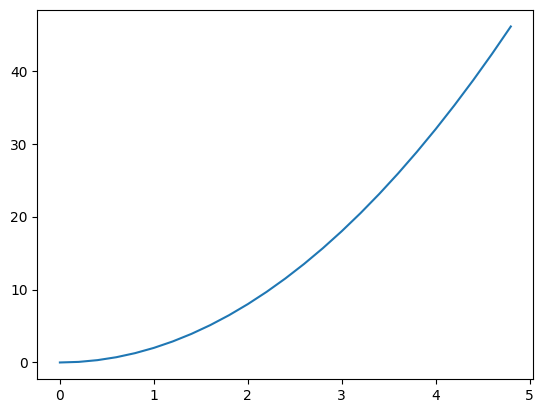

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return 2*x**2
    
x = np.array(np.arange(0, 5, 0.2))
y = f(x)
print(x)
print(y)
plt.plot(x,y) 
plt.show()


Calculating gradient or slope of a curve, or more accurately approximating it

In [2]:
def f(x):
    return 2*x**2
    
x = np.array(np.arange(0, 5, 0.2))
y = f(x)

p2_delta = 0.0001
x1 = 1
x2 = x1 + p2_delta
 # add delta
y1 = f(x1)
 # result at the derivation point
y2 = f(x2)
 # result at the other, close point
approximate_derivative = (y2-y1)/(x2-x1)  #same as y2-y1/p2_delta
print(approximate_derivative)

4.0001999999987845


This method of taking a very small step and calculating the delta is called **Numerical Derivative**. 

Finding the tangent of a curve at a given point:

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.0
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.0
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.0
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.0


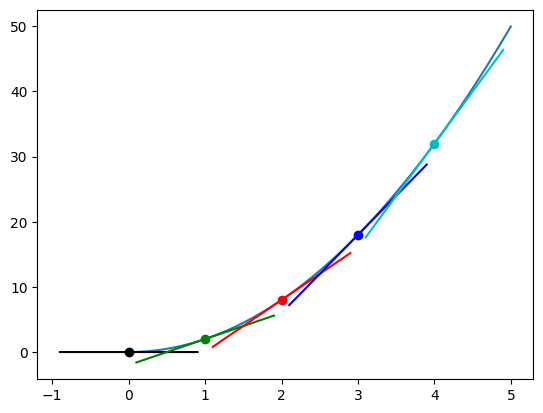

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return 2*x**2
# np.arange(start, stop, step) to give us a smoother curve
x = np.array(np.arange(0, 5, 0.001))
y = f(x)
plt.plot(x, y)
colors = ['k', 'g', 'r', 'b', 'c']
def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative*x) + b

for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1+p2_delta
    y1 = f(x1)
    y2 = f(x2)
    print((x1, y1), (x2, y2))
    approximate_derivative = (y2-y1)/(x2-x1)
    b = y2-(approximate_derivative*x2)
    to_plot = [x1-0.9, x1, x1+0.9]
    plt.scatter(x1, y1, c=colors[i])
    plt.plot([ point for point in to_plot ], 
            [ approximate_tangent_line(point, approximate_derivative) for point in to_plot],
            c=colors[i]
        )
    print('Approximate derivative for f(x)',
    f'where x = {x1} is {approximate_derivative:.1f}')
plt.show()

For this simple function, f(x) = 2x2, we didn’t pay a high penalty by approximating the derivative
(i.e., the slope of the tangent line) like this, and received a value that was close enough for our
needs.

The problem is that the actual function employed in our neural network is not so simple. The
loss function contains all of the layers, weights, and biases — it’s an absolutely massive function
operating in multiple dimensions

#  Analytical Derivative

Quick Maths reminder on derivatives 

![derivative of x](image-4.png)

![derivative of a quadratic function](image-5.png)

![Alt text](image-6.png)



# Chapter 8 - Gradients, Partial Derivatives, and the Chain Rule
The derivatives that we’ve solved so far have been cases where there is only one independent variable in the function; that is, the result depended solely on *x*. However, our neural network consists, for example, of neurons, which have multiple inputs. 

To learn the impact of all of the inputs, weights, and biases to the neuron output and at the end of the loss function, we need to calculate
the derivative of each operation performed during the forward pass in the neuron and the whole model. To do that, we'll use the chain rule.


## The Partial Derivative

To denote the partial derivative, we’ll be using Euler’s notation. It’s very similar to Leibniz’s notation, as we only need to replace the differential operator d with ∂.

We are interested in the partial derivatives,
a situation where we try to find the impact of the given input to the output while treating all of the
other inputs as constants. We are interested in the impact of singular inputs since our goal, in the
model, is to update parameters. The ∂ operator means explicitly that — the partial derivative:

![partial derivative](image-7.png)

Calculating the partial derivative with respect to a given input means to calculate it like the regular
derivative of one input, just while treating other inputs as constants. 

![Alt text](image-8.png)

for example, 

![partial derivative example](image-9.png)

[total vs partial derivative](https://math.stackexchange.com/a/174272)

![partial deriv harder example](image-10.png)

--

When terms are multiplied, we still the other variables like constants. Hence we can move them outside the derivative. 

![Alt text](image-11.png)

example:

![Alt text](image-12.png)



## Partial Derivative of Max function
The max function returns the greatest input. We know that the derivative of x with respect to x
equals 1, so the derivative of this function with respect to x equals 1 if x is greater than y, since the function will return x. In the other case, where y is greater than x and will get returned instead, the derivative of max() with respect to x equals 0 — we treat y as a constant, and the derivative of y with respect to x equals 0. We can denote that as 1(x > y), which means 1 if the condition is met, and 0 otherwise.

```max(x, y). In  our ReLU activation function f(x) = max(x, 0) -> df(x)/d(x) = 1*(x>0)```

## The Gradient


![Alt text](image-14.png)

![Alt text](image-13.png)

That’s all we have to know abxout the gradient - it’s a vector of all of the possible partial
derivatives of the function, and we denote it using the ∇ — nabla symbol that looks like an
inverted delta symbol.

We’ll be using derivatives of single-parameter functions and gradients of multivariate functions to perform gradient descent using the chain rule, or, in other words, to perform the backward pass, which is a part of the model training. 

# The Chain Rule

See book page 176. 

![Alt text](image-15.png)

______________________________
# Chapter 9 - backpropagation

At first, let's backpropagate only a single ReLU activated neuron and minimize its loss. Later we will scale this to the full neural network. 


In [4]:
# a neuron with three inputs

x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

print(xw0, xw1, xw2, b)
# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print(z)
# ReLU activation function
y = max(z, 0)
print(y)

-3.0 2.0 6.0 1.0
6.0
6.0


![Alt text](image-17.png)

This is the full forward pass through a single neuron and a ReLU activation function. Let’s treat all of these chained functions as one big function which takes input values (x), weights (w), and bias (b), as inputs, and outputs y. 

The first step is to backpropagate our gradients by calculating derivatives and partial derivatives with respect to each of our parameters and inputs using the **chain rule**.

![Alt text](image-18.png)

y = ReLU(sum(mul(x0, w0), mul(x1, w1), mul(x2, w2), b))

![Alt text](image-20.png)

For legibility, we did not denote the ReLU() parameter, which is the full sum, and the sum
parameters, which are all of the multiplications of inputs and weights.



In [5]:
# Derivative of ReLU with respect to the neuron's output, z 
# Gradient will be one if z > 0. Else no gradient (since 0). 
drelu_dz = (1. if z > 0 else 0.)

# The derivative from the next layer
# let’s assume that our neuron receives a gradient of 1 from the next layer. We’re making up 
# this value for demonstration purposes, and a value of 1 won’t change the values, which 
# means that we can more easily show all of the processes.
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * drelu_dz
print(drelu_dz)

1.0


![Alt text](image-21.png)

Now we want to calculate the partial derivative of the sum function, and then, using the chain rule, multiply this by the partial derivative of the subsequent, outer, function, which is ReLU. We’ll call these results the: 
- drelu_dxw0 — the partial derivative of the ReLU w.r.t. the first weighed input, w0x0,
- drelu_dxw1 — the partial derivative of the ReLU w.r.t. the second weighed input, w1x1,
- drelu_dxw2 — the partial derivative of the ReLU w.r.t. the third weighed input, w2x2,
- drelu_db — the partial derivative of the ReLU with respect to the bias, b.

![Alt text](image-22.png)



In [6]:
# before ReLU, we sum all weights and bias
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
print('drelu_dxw0 ', drelu_dxw0)

dsum_dxw1 = 1
drelu_dxw1 = drelu_dz * dsum_dxw1
print('drelu_dxw1 ', drelu_dxw1)

dsum_dxw2 = 1
drelu_dxw2 = drelu_dz * dsum_dxw2
print('drelu_dxw2 ', drelu_dxw2)

dsum_db = 1
drelu_db = drelu_dz * dsum_db
print('drelu_db ', drelu_db)

drelu_dxw0  1.0
drelu_dxw1  1.0
drelu_dxw2  1.0
drelu_db  1.0


![w.r.t bias](image-23.png)

![w.r.t first weighted input](image-24.png)

![w.r.t second weighted input](image-25.png)

you get the idea...

Continuing backward, the next derivative will be that on mutliplication of weights with inputs. 
The partial derivative of the first weighted input *w0x0* with respect to the input *x0*, is just the weight, *w0*.


Working backward by taking the ReLU() derivative, taking the summing operation’s derivative, multiplying both, and so on, is a process called **backpropagation** using the **chain rule**. As the name implies, the resulting output function’s gradients are passed back through the neural network. 

In [7]:
# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0
print(drelu_dx0)

#dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
#drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)


-3.0
-3.0 1.0 -1.0 -2.0 2.0 3.0


![Alt text](image-26.png)

### Optimisation

now that we have the following terms 
```py
drelu_dx0 = drelu_dxw0 * dmul_dx0 
dmul1_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * w[0]
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dx0 = drelu_dz * dsum_dxw0 * w[0]
dsum_dxw0 = 1
drelu_dx0 = drelu_dz * 1 * w[0] = drelu_dz * w[0]

drelu_dz = dvalue * (1. if z > 0 else 0.)
drelu_dx0 = dvalue * (1. if z > 0 else 0.) * w[0]
```
we can start solving

![Alt text](image-27.png)


```py
drelu_dx0 = drelu_dxw0 * w[0]
drelu_dx0 = drelu_dz * 1 * w[0]
drelu_dx0 = dvalue*(1 if z > 0 else 0) * 1 * w[0]
```

In this equation, starting from the left-hand side, is the derivative calculated in the next layer, with respect to its inputs — this is the **gradient backpropagated** to the current layer, which is the derivative of the **ReLU** function, and the partial derivative of the neuron’s function with respect to the *x0* input. This is all multiplied by applying the **chain rule** to calculate the impact of the input to the neuron on the whole function’s output.

We are going to code all of these derivatives in the Dense layer’s class and the ReLU activation class for the backpropagation step.

All together, the partial derivatives above, combined into a vector, make up our gradients. Our
gradients could be represented as:

```py
dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db # gradient on bias...just 1 bias here
```

We can start applying these gradients to the weights to minimize the output loss. 

In [8]:
# For this single neuron example, we also won’t need our dx. With many layers, we will continue
# backpropagating to preceding layers with the partial derivative with respect to our inputs.

dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db # gradient on bias...just 1 bias here

w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db
print(w, b)

[-3.001, -0.998, 1.997] 0.999


Each neuron from the next layer will return a partial derivative of its function with respect to this input. The neuron in the current layer will receive a vector consisting of these derivatives. We need this to be a singular value for a singular neuron. To continue backpropagation, we need to sum this vector. 

As opposed to a single neuron, a layer outputs a vector of values instead of a singular value. During backpropagation, each neuron from the current layer will receive a vector of partial derivatives the same way that we described for a single neuron. 


To calculate the partial derivatives with respect to inputs, we need the weights — the partial
derivative with respect to the input equals the related weight. This means that the array of
partial derivatives with respect to all of the inputs equals the array of weights. Since this array is transposed, we’ll need to sum its rows instead of columns

In [9]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])
# recall that we keep weights transposed
weights = weights.T
# Sum weights related to the given input multiplied by
# the gradient related to the given neuron
dx0 = sum([ weights[0][0]*dvalues[0][0], 
            weights[0][1]*dvalues[0][1],
            weights[0][2]*dvalues[0][2]])

dx1 = sum([ weights[1][0]*dvalues[0][0], 
            weights[1][1]*dvalues[0][1],
            weights[1][2]*dvalues[0][2]])

dx2 = sum([ weights[2][0]*dvalues[0][0], 
            weights[2][1]*dvalues[0][1],
            weights[2][2]*dvalues[0][2]])

dx3 = sum([ weights[3][0]*dvalues[0][0], 
            weights[3][1]*dvalues[0][1],
            weights[3][2]*dvalues[0][2]])

dinputs = np.array([dx0, dx1, dx2, dx3])
# dinputs is a gradient of the neuron function with respect to inputs.
print(dinputs)

# ================================================
# simplifying using numpy

# Sum weights related to the given input multiplied by
# the gradient related to the given neuron
dx0 = sum(weights[0]*dvalues[0])
dx1 = sum(weights[1]*dvalues[0])
dx2 = sum(weights[2]*dvalues[0])
dx3 = sum(weights[3]*dvalues[0])

dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

## The sum of the multiplication of the elements is the dot product!!
## We can achieve the same result by using the np.dot function. 

# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]
[ 0.44 -0.38 -0.07  1.37]
[ 0.44 -0.38 -0.07  1.37]


We have to account for one more thing — a batch of samples. So far, we have been using a single
sample responsible for a single gradient vector that is backpropagated between layers. 

Let’s replace the singular gradient dvalues[0] with a full list of gradients, dvalues, and add more example gradients to this list:

In [10]:
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights

weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T  # <- recall that we keep weights transposed


# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


Calculating the gradients with respect to weights is very similar, but, in this case, we’re going to be using gradients to update the weights, so we need to match the shape of weights, not inputs.
Then we use these transposed inputs as the first parameter to the dot product — the dot product is going to multiply rows by inputs, where each row, as it is transposed, contains data for a given input for all of the samples, by the columns of dvalues.


In [11]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])
# We have 3 sets of inputs - samples
inputs = np.array([ [1, 2, 3, 2.5],
                    [2., 5., -1., 2],
                    [-1.5, 2.7, 3.3, -0.8]])
# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dweights = np.dot(inputs.T, dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


This output’s shape matches the shape of weights because we summed the inputs for each weight
and then multiplied them by the input gradient. *dweights* is a gradient of the neuron function
with respect to the weights.

For the biases and derivatives with respect to them, the derivatives come from the sum operation
and always equal 1, multiplied by the incoming gradients to apply the chain rule. Since gradients
are a list of gradients (a vector of gradients for each neuron for all samples), we just have to sum them with the neurons, column-wise, along axis 0.


In [12]:
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
[2., 2., 2.],
[3., 3., 3.]])
# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])
# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(dvalues, axis=0, keepdims=True) # keepdims lets us keep the gradient as a row vector
print(dbiases)

[[6. 6. 6.]]


In [13]:
# Example layer output
z = np.array([  [1, 2, -3, -4],
                [2, -7, -1, 3],
                [-1, 2, 5, -1]])
dvalues = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])
# ReLU activation's derivative
drelu = np.zeros_like(z)
drelu[z > 0] = 1
print(drelu)
# The chain rule
drelu *= dvalues
print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


To calculate the ReLU derivative, we created an array filled with zeros. np.zeros_like is
a NumPy function that creates an array filled with zeros, with the shape of the array from its
parameter, the z array in our case, which is an example output of the neuron.

We can now simplify this operation. Since the ReLU() derivative array is filled with 1s, which do
not change the values multiplied by them, and 0s that zero the multiplying value, this means that
we can take the gradients of the subsequent function and set to 0 all of the values that correspond to the ReLU() input and are equal to or less than 0:

In [14]:
# Example layer output
z = np.array([  [1, 2, -3, -4],
                [2, -7, -1, 3],
                [-1, 2, 5, -1]])
dvalues = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])
# ReLU activation's derivative
# with the chain rule applied
drelu = dvalues.copy()
drelu[z <= 0] = 0
print(drelu)

[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


Let’s combine the forward and backward pass of a single neuron with a full layer and batch-based
partial derivatives. We’ll minimize ReLU’s output, once again, only for this example:

In [15]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])
# We have 3 sets of inputs - samples
inputs = np.array([ [1, 2, 3, 2.5],
                    [2., 5., -1., 2],
                    [-1.5, 2.7, 3.3, -0.8]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])
# Forward pass
layer_outputs = np.dot(inputs, weights) + biases # Dense layer
relu_outputs = np.maximum(0, layer_outputs) # ReLU activation
# Let's optimize and test backpropagation here
# ReLU activation - simulates derivative with respect to input values
# from next layer passed to current layer during backpropagation
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0
# Dense layer
# dinputs - multiply by weights
dinputs = np.dot(drelu, weights.T)
# dweights - multiply by inputs
dweights = np.dot(inputs.T, drelu)
# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(drelu, axis=0, keepdims=True)
# Update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases
print(weights)
print(biases)

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]


In this code, we replaced the plain Python functions with NumPy variants, created example data,
calculated the forward and backward passes, and updated the parameters. 

Now we will update the dense layer and ReLU activation code with a backward method (for backpropagation), which we’ll call during the backpropagation phase of our model.

In [16]:
class Layer_Dense:
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
        
# ReLU activation
class Activation_ReLU:
    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

# Categorical Cross-Entropy loss derivative

![Alt text](image-28.png)

![Alt text](image-29.png)

The derivative of this loss function with respect to its inputs (predicted values at the i-th sample,
since we are interested in a gradient with respect to the predicted values) equals the negative
ground-truth vector, divided by the vector of the predicted values (which is also the output vector
of the softmax function).

In [17]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy():
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])
        # If labels are sparse, turn them into one-hot vector
        # If the shape of the labels returns a single dimension (which means that they are shaped like a list and not like an array), they consist of discrete numbers and need to be converted to a list of one-hot encoded vectors — a two-dimensional array. 
        # see below
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

import numpy as np
print(np.eye(5))

# We can then index this table with the numerical label to get the one-hot encoded vector that represents it:
print()
print(np.eye(5)[1]) #2nd elem
print(np.eye(5)[4]) #5th elem
#converted to one-hot:

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1.]


The final operation is the gradient normalization. As we’ll learn in the next chapter, optimizers sum all of the gradients related to each weight and bias before multiplying them by the learning rate (or some other factor). 

What this means, in our case, is that the more samples we have in a dataset, the more gradient sets we’ll receive at this step, and the bigger this sum will become. To solve this problem, we can divide all of the gradients by the number of samples. A sum of elements divided by a count of them is their mean value (and, as we mentioned, the optimizer will perform the sum) — this way, we’ll effectively normalize the gradients and make their sum’s magnitude invariant to the number of samples.

# Softmax Activation Derivative

![Alt text](image-30.png)

![Alt text](image-31.png)

Each input to the Softmax impacts each of the outputs, and we need to calculate the partial derivative of each output with respect to each input. From the programming side of things, if we calculate the impact of one list on the other list, we’ll receive a matrix of values as a result. That’s exactly what we’ll calculate here — we’ll calculate the **Jacobian matrix**.


Firstly, derivative of the division operation is 

![Alt text](image-32.png)

which is 

![Alt text](image-33.png)

absolutely nasty.

I'm not going to into the details of this derivative, as it's a complex number of steps. 
Some of the terms cancel out to 0 as we have to consider each derivative term with respect to the Softmax' inputs *z*, whose value change (*j*, *k* and *l*). 

Please revisit page 220 of the book. 

The derivative evaluates to: 

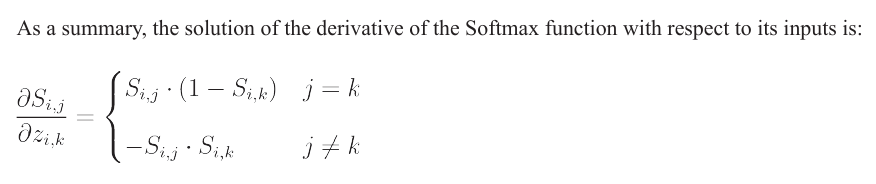

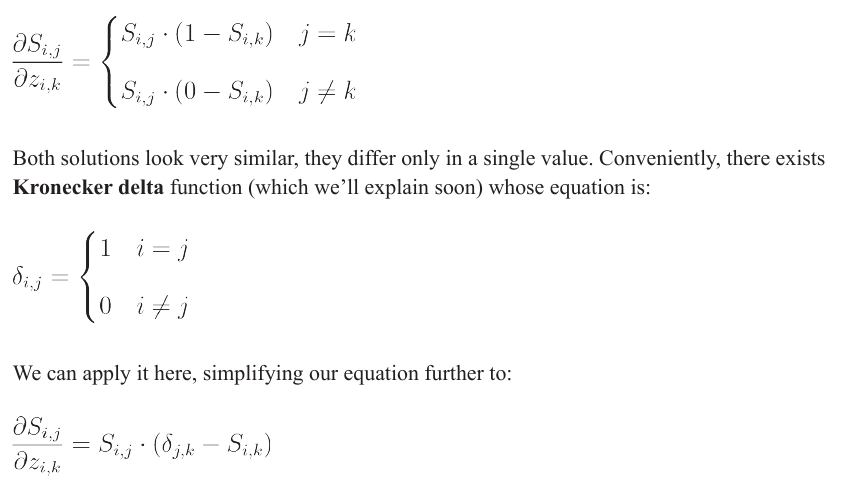

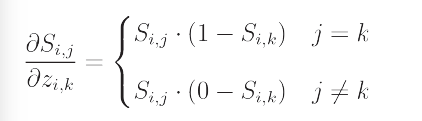

# Softmax activation derivative code implementation

In [24]:
softmax_output = [0.7, 0.1, 0.2]
softmax_output = np.array(softmax_output).reshape(-1, 1)

print(softmax_output)
# The Kronecker delta equals 1 when both inputs are equal, and 0 otherwise. 
# If we visualize this as an array, we’ll have an array of zeros with ones on the diagonal
print(np.eye(softmax_output.shape[0]))
print(softmax_output * np.eye(softmax_output.shape[0]))

#or equivalent using diagflat, faster:

print(np.diagflat(softmax_output))


[[0.7]
 [0.1]
 [0.2]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]
[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]


The other part of the equation is S*i,j* S*i,k* — the multiplication of the Softmax outputs, iterating over the j and k indices respectively. Since, for each sample (the i index), we’ll have to multiply the values from the Softmax function’s output (in all of the combinations), we can use the dot product operation. For this, we’ll just have to transpose the second argument to get its row vector form (as described in chapter 2):

In [26]:
print(np.dot(softmax_output, softmax_output.T))

# Finally, we can perform the subtraction of both arrays (following the equation):

print(np.diagflat(softmax_output) - np.dot(softmax_output, softmax_output.T))


[[0.49 0.07 0.14]
 [0.07 0.01 0.02]
 [0.14 0.02 0.04]]
[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]


The matrix result of the equation and the array solution provided by the code is called the
Jacobian matrix. In our case, the Jacobian matrix is an array of partial derivatives in all of the combinations of both input vectors. Remember, we are calculating the partial derivatives of every output of the Softmax function with respect to each input separately.

The result of this operation, performed on a batch of samples, is a list of the Jacobian matrices, which effectively forms a 3D matrix.

What do we do with the fact that the previous layer, which is the Dense layer, will expect the gradients to be a 2D array? Currently, we have a 3D array of the partial derivatives — a list of the Jacobian matrices. 

We need to sum the values from these vectors so that each of the inputs for each of the samples will return a single partial derivative value instead. Because each input influences all of the outputs, the returned vector of the partial derivatives has to be summed up for the final partial derivative with respect to this input.

We can perform this operation on each of the Jacobian matrices directly, applying the chain rule at the same time (applying the gradient from the loss function) using np.dot() — For each sample, it’ll take the row from the Jacobian matrix and multiply it by the corresponding value from the loss function’s gradient. As a result, the dot product of each of these vectors and values will return a singular value, forming a vector of the partial derivatives sample-wise and a 2D array (a list of the resulting vectors) batch-wise.

In [ ]:
# Softmax activation
class Activation_Softmax:
    #...
    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate pairs of outputs and gradients (zip)
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

# Common Categorical Cross-Entropy loss and Softmax activation derivative

At the moment, we have calculated the partial derivatives of the Categorical Cross-Entropy loss and Softmax activation functions, and we can finally use them, but there is still one more step  that we can perform to speed the calculations up.

The derivatives of Loss and Softmax functions combine to solve a simple equation — the whole code implementation is simpler and faster to execute. This is because we can plug the outputs of Softmax layer to the loss. 

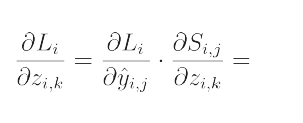

Let’s apply the chain rule to calculate the partial derivative of the Categorical Cross-Entropy loss function with respect to the Softmax function inputs.

We know that the inputs to the loss function, y-hati,j, are the outputs of the activation function, Si,j:

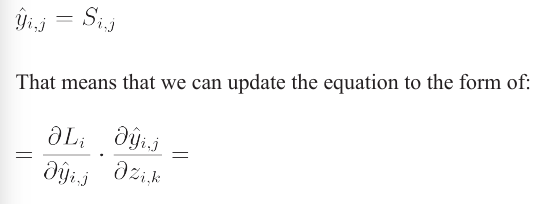

# todo 


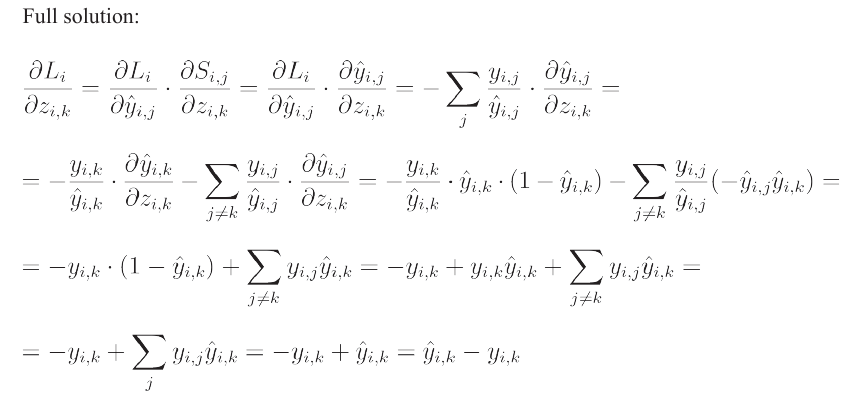

As we can see, when we apply the chain rule to both partial derivatives, the whole equation simplifies significantly to the subtraction of the predicted and ground truth values. It is also multiple times faster to compute.

## Code Implementation

We’ll code the solution as a separate class, which initializes both the Softmax activation and the Categorical Cross-Entropy objects, calling their forward methods respectively during the forward pass. Then the new backward pass is going to contain the new code:

In [ ]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        
    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)
    
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        
        # If labels are one-hot encoded,
        # turn them into discrete values (index list)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

Please see page 238 to view the optimized vs non optimized code running including performance differences using `timeit` module. 

The result was 7 times faster